In [4]:
#importacion de librerias
from PIL import Image
import numpy as N
import matplotlib.pylab as pylab
import webbrowser

%matplotlib inline

#archivo con imagen de entrada
file1 = 'brain1.bmp'
file2 = 'brain1_Rcortex.bmp'

# carga imagen
im = Image.open(file1)
webbrowser.open(file1)
im2 = Image.open(file2)
webbrowser.open(file2)

#formato, modo color y dimensiones de imagen
print im.format, im.mode, im.size
print im2.format, im2.mode, im2.size

#convierte datos imagen a arreglo numpy
im_array = N.array(im)
mask = N.array(im2)

#dimensiones y tipo de arreglo de datos de la imagen
print im_array.shape, im_array.dtype
print mask.shape, mask.dtype

#aplica mascara a imagen 1
dimX = im_array.shape[0]
dimY = im_array.shape[1]
maxValue = mask.max()

#crea nuevo arreglo vacio
out = N.zeros(mask.shape, 'uint8')

for i in xrange(dimX):
    for j in xrange(dimY):
        if mask[i][j] == maxValue:
        out[i][j] = im_array[i][j]


BMP L (256, 258)
BMP L (256, 258)
(258L, 256L) uint8
(258L, 256L) uint8


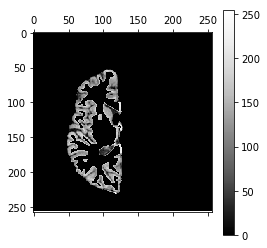

In [5]:
#una forma mas eficiente ---------------
out = N.zeros(mask.shape, 'uint8')
ind = N.where(mask == maxValue)
out[ind] = im_array[ind]

#----------------------------------------
#otra forma deja mascara en 1
out = N.zeros(mask.shape, 'uint8')
mask /= maxValue
out = im_array*mask
#----------------------------------------

#despliega imagen usando matplotlib.pylab
ax = pylab.matshow(out, cmap=pylab.cm.Greys_r)
fm = pylab.get_current_fig_manager()
fig = pylab.figure(fm.num)
fig.colorbar(ax)
#fig.show()
